
# Histopathologic Cancer Detection with Tensorflow Deep Learning



 * Dhiego Souto Andrade
 * Patrick Cesar Alves Terrematte 
 * Lourdes Milagros Mendoza Villavicencio 

## Goals

* to classify cancerous images (IDC : invasive ductal carcinoma) vs non-IDC images.

* to compare results with two distinct dataset with two and four classes of histological images with cancer tissues.

* to reproduce and improve the results of the following published paper:
  * Araújo T, Aresta G, Castro E, Rouco J, Aguiar P, Eloy C, et al. (2017) Classification of breast cancer histology images using Convolutional Neural Networks. PLoS ONE 12(6).. https://doi.org/10.1371/journal.pone.0177544





## Mounting Google Drive locally

Select your Google Drive Account where is the Dataset of Breast Images, and *Enter your authorization code*.




In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
!ls /content/gdrive/My\ Drive/database\ breast/Code/

'1 Images and Omics.ipynb'	      log		     test_subset.csv
 aprendizado.py			      test.csv		     train.csv
'Cancer Image TensorFlow CNN.ipynb'   test_data_labels.txt   train_subset.csv



Code to generate the train data from .tiff files with label on the folders name.



In [0]:
'''
import cv2
import numpy as np
from os import listdir
from os.path import isfile,join



#mypath = '/content/gdrive/My Drive/database breast/Training_data/'
mypath = '/content/gdrive/My Drive/database breast/Training_data_subset/'
onlyfolders = [f for f in listdir(mypath)]

dim = (256, 256)

#dim = (512, 512)
output = []

for folder in onlyfolders :
    onlyfiles = [f for f in listdir(mypath + folder) if isfile(join(mypath + folder, f))]
    for image in onlyfiles :
        src = cv2.imread(mypath + folder + '/' + image)

        if(src is not None):
            resized = cv2.resize(src,dim,interpolation = cv2.INTER_AREA)
            resized = resized.reshape(1, 256,256, 3)
            c = np.array (np.append(resized[0], np.array([onlyfolders.index(folder)])) )
            output.append(c)

out = np.array(output)
out.astype(int)
#np.savetxt('train.csv', out, fmt='%i', delimiter = ',')
np.savetxt('train_subset.csv', out, fmt='%i', delimiter = ',')
'''

"\nimport cv2\nimport numpy as np\nfrom os import listdir\nfrom os.path import isfile,join\n\n\n\n#mypath = '/content/gdrive/My Drive/database breast/Training_data/'\nmypath = '/content/gdrive/My Drive/database breast/Training_data_subset/'\nonlyfolders = [f for f in listdir(mypath)]\n\ndim = (256, 256)\n\n#dim = (512, 512)\noutput = []\n\nfor folder in onlyfolders :\n    onlyfiles = [f for f in listdir(mypath + folder) if isfile(join(mypath + folder, f))]\n    for image in onlyfiles :\n        src = cv2.imread(mypath + folder + '/' + image)\n\n        if(src is not None):\n            resized = cv2.resize(src,dim,interpolation = cv2.INTER_AREA)\n            resized = resized.reshape(1, 256,256, 3)\n            c = np.array (np.append(resized[0], np.array([onlyfolders.index(folder)])) )\n            output.append(c)\n\nout = np.array(output)\nout.astype(int)\n#np.savetxt('train.csv', out, fmt='%i', delimiter = ',')\nnp.savetxt('train_subset.csv', out, fmt='%i', delimiter = ',')\n"

Code to generate the holdout data from .tiff files with label on the folders name.


In [0]:
'''
import cv2
import numpy as np
from os import listdir
from os.path import isfile,join


#mypath = '/content/gdrive/My Drive/database breast/Test_data/'
mypath = '/content/gdrive/My Drive/database breast/Test_data_subset/'

onlyfolders = [f for f in listdir(mypath)]

#dim = (512, 512) 
dim = (256, 256) # reducing images
output = []

for folder in onlyfolders :
    onlyfiles = [f for f in listdir(mypath + folder) if isfile(join(mypath + folder, f))]
    for image in onlyfiles :
        src = cv2.imread(mypath + folder + '/' + image)

        if(src is not None):
            resized = cv2.resize(src,dim,interpolation = cv2.INTER_AREA)
            resized = resized.reshape(1, 256,256, 3)
            c = np.array (np.append(resized[0], np.array([onlyfolders.index(folder)])) )
            output.append(c)

out = np.array(output)
out.astype(int)
np.savetxt('/content/gdrive/My Drive/database breast/Code/test_subset.csv', out, fmt='%i', delimiter = ',')
'''

"\nimport cv2\nimport numpy as np\nfrom os import listdir\nfrom os.path import isfile,join\n\n\n#mypath = '/content/gdrive/My Drive/database breast/Test_data/'\nmypath = '/content/gdrive/My Drive/database breast/Test_data_subset/'\n\nonlyfolders = [f for f in listdir(mypath)]\n\n#dim = (512, 512) \ndim = (256, 256) # reducing images\noutput = []\n\nfor folder in onlyfolders :\n    onlyfiles = [f for f in listdir(mypath + folder) if isfile(join(mypath + folder, f))]\n    for image in onlyfiles :\n        src = cv2.imread(mypath + folder + '/' + image)\n\n        if(src is not None):\n            resized = cv2.resize(src,dim,interpolation = cv2.INTER_AREA)\n            resized = resized.reshape(1, 256,256, 3)\n            c = np.array (np.append(resized[0], np.array([onlyfolders.index(folder)])) )\n            output.append(c)\n\nout = np.array(output)\nout.astype(int)\nnp.savetxt('/content/gdrive/My Drive/database breast/Code/test_subset.csv', out, fmt='%i', delimiter = ',')\n"

In [0]:
! ls -alih /content/gdrive/My\ Drive/database\ breast/Code/

total 856M
49 -rw------- 1 root root  1.1M Dec 15 21:42 '1 Images and Omics.ipynb'
41 -rw------- 1 root root  1.4K Jul  1 14:47  aprendizado.py
48 -rw------- 1 root root 1023K Dec 14 21:40 'Cancer Image TensorFlow CNN.ipynb'
47 drwx------ 2 root root  4.0K Dec 13 01:56  log
46 -rw------- 1 root root  107M Dec 12 21:33  test.csv
45 -rw------- 1 root root   717 Dec 12 20:56  test_data_labels.txt
44 -rw------- 1 root root  6.0M Dec 12 20:55  test_subset.csv
42 -rw------- 1 root root  736M Dec 11 15:44  train.csv
43 -rw------- 1 root root  6.0M Dec 12 20:27  train_subset.csv


# Importing Cancer Images with TIF format from Dataset with dim 512 x 512


Reading the *train.csv*.

In [0]:

import numpy as np
import pandas as pd

print('iniciando leitura')

# chunksize = 100000
#
# for chunk in pd.read_csv('dataset2.csv', sep=',', chunksize=chunksize):
#     dataset = pd.concat(chunk, ignore_index=True)
#
# #TextFileReader = pd.read_csv('dataset2.csv', sep=',', chunksize=chunksize, iterator=True, engine='python')
# #dataset = pd.concat(TextFileReader, ignore_index=True)

path = '/content/gdrive/My Drive/database breast/Code/'

# Subsetting 70 training samples:
#idx = np.random.choice(249,70)

train =  np.loadtxt(path + 'train.csv',  delimiter = ',')#[idx]
#train =  np.loadtxt(path + 'train_subset.csv',  delimiter = ',')

test =   np.loadtxt(path + 'test.csv',  delimiter = ',')
#test =   np.loadtxt(path + 'test_subset.csv',  delimiter = ',')

print('leitura finalizada')


iniciando leitura
leitura finalizada


In [0]:
train.shape

(70, 786433)

In [0]:
train = np.append( train,test, axis=0)
x_images = train[:, :-1]
y_images = train[:, -1]
print(x_images.shape)
x_images = x_images.reshape(x_images.shape[0], 512, 512, 3)
print(x_images.shape)
del test
del train

(106, 786432)
(106, 512, 512, 3)


In [0]:
## normalize data

# convert one-hot encodings into labels
def one_hot_to_dense(labels_one_hot):
    return np.argmax(labels_one_hot,1)

# convert class labels from scalars to one-hot vectors e.g. 1 => [0 1], 0 => [1 0]
def dense_to_one_hot(labels_dense, num_classes):
    num_labels = labels_dense.shape[0]
    index_offset = np.arange(num_labels) * num_classes
    labels_one_hot = np.zeros((num_labels, num_classes))
    labels_one_hot.flat[index_offset + labels_dense.ravel()] = 1
    return labels_one_hot

# function to normalize data
def normalize_data(data): 
    # scale features using statistics that are robust to outliers
    #rs = sklearn.preprocessing.RobustScaler()
    #rs.fit(data)
    #data = rs.transform(data)
    #data = (data-data.mean())/(data.std()) # standardisation
    data = data / data.max() # convert from [0:255] to [0.:1.]
    #data = ((data / 255.)-0.5)*2. # convert from [0:255] to [-1.:+1.]
    return data

# training and validation data
#x_train_valid = normalize_data(x_images)
x_train_valid = normalize_data(x_images)
                               
# use one-hot encoding for labels 0,1
#y_train_valid = dense_to_one_hot(y_images, 2).astype(np.uint8)

from keras.utils import to_categorical
y_train_valid = to_categorical(y_images)


# Split of Sets for Validation and Test
from sklearn.model_selection import train_test_split

# x_train_valid, x_holdout, y_train_valid, y_holdout = train_test_split(x_train_valid, y_train_valid, test_size=0.3, random_state=42)

train_data, test_data, train_labels, test_labels = train_test_split(x_train_valid, y_train_valid, test_size=0.3, random_state=42)


Using TensorFlow backend.


# Generating new images and Visualizing

train_data.shape = (74, 512, 512, 3)
train_data.min/mean/std/max = 0.00/0.72/0.19/1.00

train_labels.shape = (74, 4)
train_labels.min/mean/std/max = 0.00/0.25/0.43/1.00


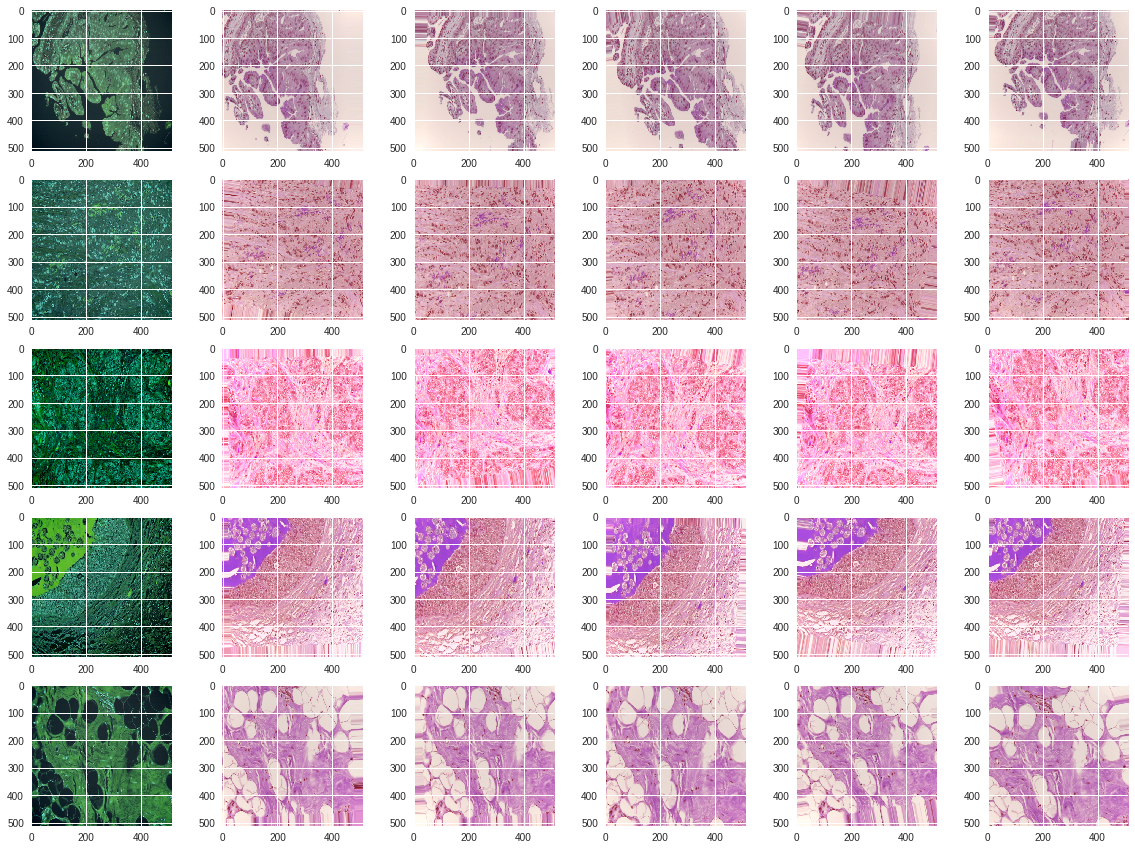

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm  
%matplotlib inline

import keras.preprocessing.image


# dictionaries for saving results
y_valid_pred = {}
y_train_pred = {}
y_test_pred = {}
train_loss, valid_loss = {}, {}
train_acc, valid_acc = {}, {}
cnf_valid_matrix = {}

print('train_data.shape =', train_data.shape)
print('train_data.min/mean/std/max = %.2f/%.2f/%.2f/%.2f'%(train_data.min(),
                        train_data.mean(), train_data.std(), train_data.max()))
print('')
print('train_labels.shape =', train_labels.shape)
print('train_labels.min/mean/std/max = %.2f/%.2f/%.2f/%.2f'%(train_labels.min(),
                        train_labels.mean(), train_labels.std(), train_labels.max()))
#train_data.shape = (5547, 50, 50, 3)


#train_labels.shape = (5547, 2)

## augment data

# generate new images via rotations, translations, zoom using keras
def generate_images(imgs):
    
    # rotations, translations, zoom
    image_generator = keras.preprocessing.image.ImageDataGenerator(
        rotation_range = 10, width_shift_range = 0.1 , height_shift_range = 0.1,
        zoom_range = 0.1)

    # get transformed images
    imgs = image_generator.flow(imgs.copy(), np.zeros(len(imgs)),
                                batch_size=len(imgs), shuffle = False).next()    
    return imgs[0]

# check image generation
fig,axs = plt.subplots(5,6, figsize=(20,15))
for i in range(5):
    n = np.random.randint(0,x_images.shape[0]-2)
    axs[i,0].imshow(x_images[n])
    axs[i,1].imshow(generate_images(x_images[n:n+1])[0].astype('uint8'))
    axs[i,2].imshow(generate_images(x_images[n:n+1])[0].astype('uint8'))
    axs[i,3].imshow(generate_images(x_images[n:n+1])[0].astype('uint8'))
    axs[i,4].imshow(generate_images(x_images[n:n+1])[0].astype('uint8'))
    axs[i,5].imshow(generate_images(x_images[n:n+1])[0].astype('uint8'))

In [0]:
print("Type of traint_images {}\nType of train_labels {}".format(type(train_data),type(train_labels)))

print("\nShape of train data: images {}, labels {}".format(train_data.shape,train_labels.shape))

print("\nType of test {}\nType of train_labels {}".format(type(test_data),type(test_labels)))

print("\nShape of test data: images {}, labels {}".format(test_data.shape,test_labels.shape))

Type of traint_images <class 'numpy.ndarray'>
Type of train_labels <class 'numpy.ndarray'>

Shape of train data: images (74, 512, 512, 3), labels (74, 4)

Type of test <class 'numpy.ndarray'>
Type of train_labels <class 'numpy.ndarray'>

Shape of test data: images (32, 512, 512, 3), labels (32, 4)


red channel: min/mean/std/max = 23.00/217.05/30.45/255.00
green channel: min/mean/std/max = 0.00/154.20/49.06/255.00
blue channel: min/mean/std/max = 4.00/180.68/42.64/255.00


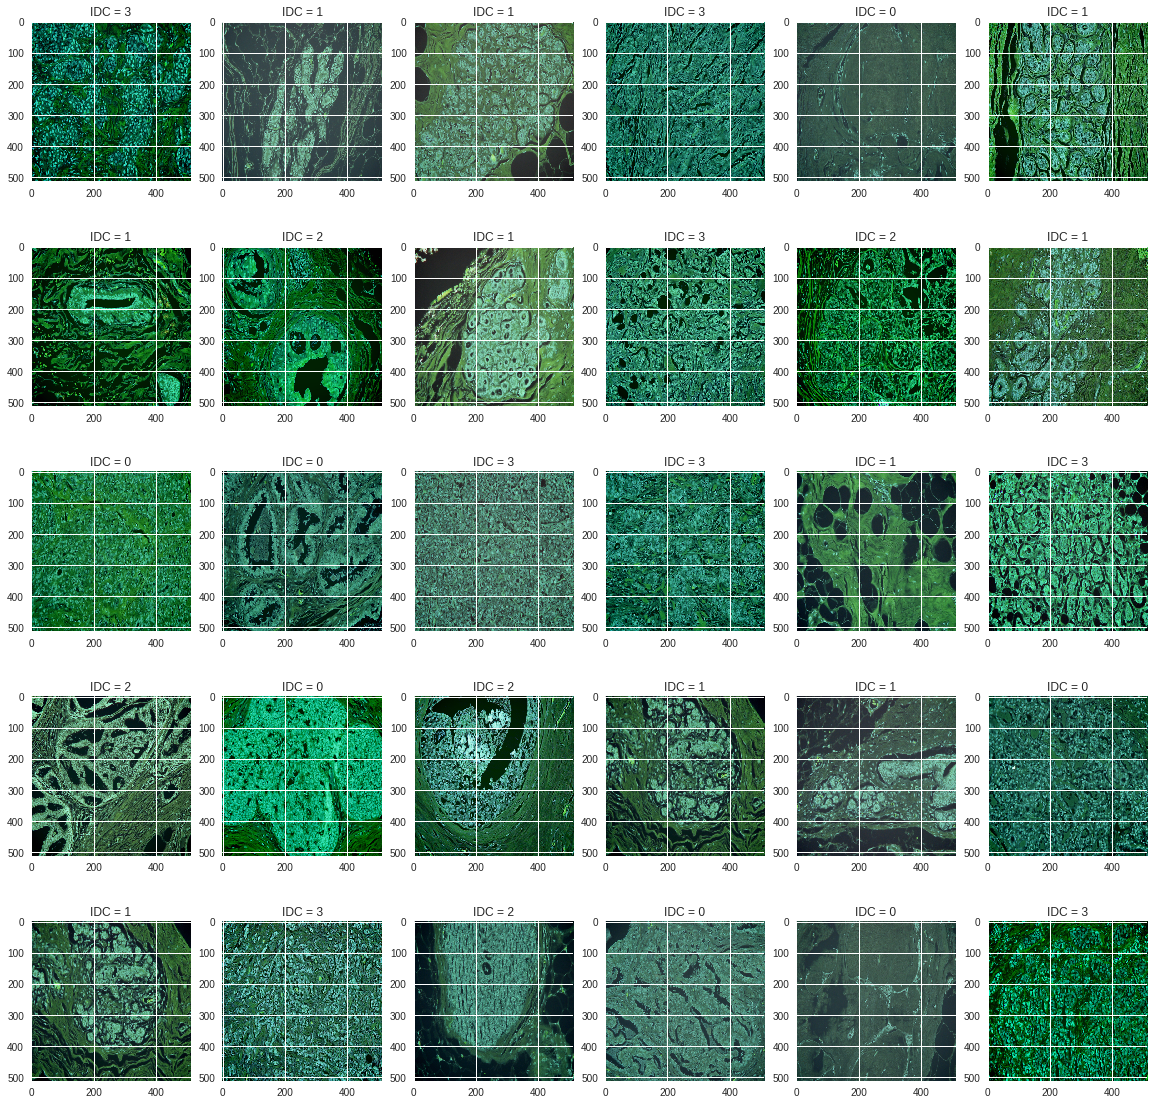

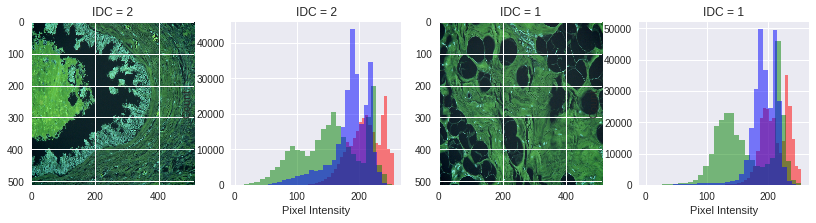

In [0]:
#x_images.shape = (5547, 512, 512, 3)
# x_images.shape = (5547, 50, 50, 3)


#y_images.shape = (5547,)

## plot some images  

imgs_0 = x_images[y_images == 0] # 0 = no cancer
imgs_1 = x_images[y_images == 1] # 1 = cancer


plt.figure(figsize=(20,20))
for i in range(30):
    plt.subplot(5,6,i+1)
    plt.title('IDC = %d'%y_images[i])
    plt.imshow(x_images[i])

plt.figure(figsize=(14,3))

for i in range(2):
    n_img = np.random.randint(len(x_images))
    plt.subplot(1,4,1+2*i)
    plt.title('IDC = %d'%y_images[n_img])
    plt.imshow(x_images[n_img])
    plt.subplot(1,4,2+2*i)
    plt.title('IDC = %d'%y_images[n_img])
    plt.ylabel('Count')
    plt.xlabel('Pixel Intensity')
    plt.hist(x_images[n_img,:,:,0].flatten(), bins=30, lw = 0,color='r', alpha=0.5);
    plt.hist(x_images[n_img,:,:,1].flatten(), bins=30, lw = 0, color='g', alpha=0.5);
    plt.hist(x_images[n_img,:,:,2].flatten(), bins=30, lw = 0, color='b', alpha=0.5);

print('red channel: min/mean/std/max = %.2f/%.2f/%.2f/%.2f'%(x_images[:,:,:,0].min(),
    x_images[:,:,:,0].mean(), x_images[:,:,:,0].std(), x_images[:,:,:,0].max()))
print('green channel: min/mean/std/max = %.2f/%.2f/%.2f/%.2f'%(x_images[:,:,:,1].min(),
    x_images[:,:,:,1].mean(), x_images[:,:,:,1].std(), x_images[:,:,:,1].max()))
print('blue channel: min/mean/std/max = %.2f/%.2f/%.2f/%.2f'%(x_images[:,:,:,2].min(),
    x_images[:,:,:,2].mean(), x_images[:,:,:,2].std(), x_images[:,:,:,2].max()))

# 3. Deep Learning to Classify Cancer Images

In [0]:
import keras
from keras import backend as K

print('Using Keras version:', keras.__version__, 
      '\nbackend:', K.backend())

Using Keras version: 2.2.4 
backend: tensorflow


In [0]:
'''
# memory footprint support libraries/code
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize
'''

'\n# memory footprint support libraries/code\n!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi\n!pip install gputil\n!pip install psutil\n!pip install humanize\n'

In [0]:
'''
import psutil
import humanize
import os
import GPUtil as GPU

# get all GPU on machine
GPUs = GPU.getGPUs()

# colab give us only one GPU
gpu = GPUs[0]

def printm():
  process = psutil.Process(os.getpid())
  print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ),
        " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
  print("GPU RAM Free: {0:.0f}MB  | Used: {1:.0f}MB | Util {2:3.0f}% |\
  Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, 
                                gpu.memoryUtil*100, gpu.memoryTotal))

printm()
'''

'\nimport psutil\nimport humanize\nimport os\nimport GPUtil as GPU\n\n# get all GPU on machine\nGPUs = GPU.getGPUs()\n\n# colab give us only one GPU\ngpu = GPUs[0]\n\ndef printm():\n  process = psutil.Process(os.getpid())\n  print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ),\n        " | Proc size: " + humanize.naturalsize( process.memory_info().rss))\n  print("GPU RAM Free: {0:.0f}MB  | Used: {1:.0f}MB | Util {2:3.0f}% |  Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, \n                                gpu.memoryUtil*100, gpu.memoryTotal))\n\nprintm()\n'

# Defining plot functions

In [0]:
# Special callback to see learning curves
class MetricsCheckpoint( keras.callbacks.Callback ):
    """Callback that saves metrics after each epoch"""
    def __init__(self, savepath):
        super(MetricsCheckpoint, self).__init__()
        self.savepath = savepath
        self.history = {}
    def on_epoch_end(self, epoch, logs=None):
        for k, v in logs.items():
            self.history.setdefault(k, []).append(v)
        np.save(self.savepath, self.history)

def plotKerasLearningCurve():
    plt.figure(figsize=(10,5))
    metrics = np.load('logs.npy')[()]
    filt = ['acc'] # try to add 'loss' to see the loss learning curve
    for k in filter(lambda x : np.any([kk in x for kk in filt]), metrics.keys()):
        l = np.array(metrics[k])
        plt.plot(l, c= 'r' if 'val' not in k else 'b', label='val' if 'val' in k else 'train')
        x = np.argmin(l) if 'loss' in k else np.argmax(l)
        y = l[x]
        plt.scatter(x,y, lw=0, alpha=0.25, s=100, c='r' if 'val' not in k else 'b')
        plt.text(x, y, '{} = {:.4f}'.format(x,y), size='15', color= 'r' if 'val' not in k else 'b')   
    plt.legend(loc=4)
    plt.axis([0, None, None, None]);
    plt.grid()
    plt.xlabel('Number of epochs')

def plot_learning_curve(history):
    plt.figure(figsize=(8,8))
    plt.subplot(1,2,1)
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('./accuracy_curve.png')
    #plt.clf()
    # summarize history for loss
    plt.subplot(1,2,2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('./loss_curve.png')    
    
# Look at confusion matrix 
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize = (6,6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    


# Talos: Hyperparameter Scanning and Optimization for Keras  Tweet

Talos is a solution that helps finding hyperparameter configurations for Keras models. To perform hyperparameter optimization with Talos, there is no need to learn any new syntax, or change anything in the way Keras models are created. Keras functionality is fully exposed, and any parameter can be included in the scans.

*   https://github.com/autonomio/talos

![alt text](https://raw.githubusercontent.com/autonomio/talos/master/logo.png)



In [0]:
!pip install talos

In [0]:
import talos as ta
from keras.optimizers import Adam, Adamax, Nadam, Adadelta, Adagrad, RMSprop
from keras.losses import categorical_crossentropy




## Creating the Keras Model


In [0]:
num_classes = train_labels.shape[1]
img_rows, img_cols = train_data.shape[1], train_data.shape[2]
input_shape = (img_rows, img_cols, 3)

def breast_cancer_model(x_train, y_train, x_val, y_val, params):
    
  # Depending on dataset
  model = Sequential()
  model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu', input_shape = input_shape))
  model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
  model.add(MaxPool2D(pool_size=(2,2)))
  model.add(BatchNormalization())
  model.add(Dropout(0.25))
  model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
  model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                   activation ='relu'))
  model.add(MaxPool2D(pool_size=(2,2)))
  model.add(BatchNormalization())
  model.add(Dropout(0.25))
  model.add(Conv2D(filters = 86, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
  model.add(Conv2D(filters = 86, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
  model.add(MaxPool2D(pool_size=(2,2)))
  model.add(BatchNormalization())
  model.add(Dropout(0.25))
  model.add(Flatten())
  model.add(Dense(16, activation = "relu"))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation = "softmax"))
  
  model.compile(loss=params['losses'],
                optimizer=params['optimizer'](),
                metrics=['acc'])

  history = model.fit(x_train, y_train, 
                      validation_data=[x_val, y_val],
                      batch_size=params['batch_size'],
                      epochs=params['epochs'],
                      verbose=0)

  return history, model

## Defining the Parameters 

In [0]:
# then we can go ahead and set the parameter space
p = {'batch_size': [16, 32],
     'epochs': [5],
     'optimizer': [Adam, Adamax, Nadam, Adadelta, Adagrad, RMSp],
     'losses': [categorical_crossentropy]}

 ## Starting the Experiment

In [0]:
# and run the experiment
t = ta.Scan(x=train_data,
            y=train_labels,
            x_val=test_data,
            y_val=test_labels,
            model=breast_cancer_model,
            grid_downsample=1, 
            params=p,
            dataset_name='breast_cancer',
            experiment_no='1',
            functional_model=True)

 ## Access the results through the Scan object 

In [0]:
# accessing the results data frame
t.data.head()

# access the summary details
t.details

# use Scan object as input
r = ta.Reporting(t)

# get the highest result for any metric
r.high('acc')

# get the round with the best result
r.rounds2high()

# get the best paramaters
r.best_params()

## Best Parameters of Talos


![alt text](https://drive.google.com/uc?export=view&id=10FZqwnlkpo0IPFeWu5zhWsT7lEH4A40m)


# Defining CNN Layers

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import MaxPool2D, Conv2D, BatchNormalization
from keras.optimizers import RMSprop
#from keras.preprocessing.image import ImageDataGenerator

# CNN architechture is In -> [[Conv2D->relu]*2 -> MaxPool2D -> Dropout]*2 -> Flatten -> Dense -> Dropout -> Out   

batch_size = 32

# Depending on dataset
num_classes = train_labels.shape[1]
epochs = 50
img_rows, img_cols = train_data.shape[1], train_data.shape[2]

input_shape = (img_rows, img_cols, 3)
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
               activation ='relu', input_shape = input_shape))
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
               activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
               activation ='relu'))
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Conv2D(filters = 86, kernel_size = (3,3),padding = 'Same', 
               activation ='relu'))
model.add(Conv2D(filters = 86, kernel_size = (3,3),padding = 'Same', 
               activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(16, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation = "softmax"))

optimizer = RMSprop(lr=0.001, decay=1e-5)

#optimizer =  keras.optimizers.Adadelta()
model.compile(optimizer = 'rmsprop' , loss='categorical_crossentropy', metrics=["accuracy"])

**How to Reduce Memory Usage**

The TPU software attempts to lay out tensors in memory to maximize computational efficiency and minimize padding. This memory layout process is complex, however, for the best results the model should obey the following rule of thumb. To minimize memory overhead and maximize computational efficiency, one of the following must be true:



*   The total batch size should be a multiple of 64 (8 per TPU core), and feature dimensions should be a multiple of 128,  or
*   The total batch size should be a multiple of 1024 (128 per TPU core), and feature dimensions should be a multiple of 8.





In [0]:
print("Train shape\n", train_data_tf.shape)
print(train_labels.shape,"\n")

print("Test shape\n",test_data_tf.shape)
print(test_labels.shape)

Train shape
 (74, 512, 512, 3)
(74, 4) 

Test shape
 (32, 512, 512, 3)
(32, 4)


In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 512, 512, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 512, 512, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 256, 256, 32)      0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 256, 256, 32)      128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 256, 256, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 256, 256, 32)      9248      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 256, 256, 32)      9248      
__________

In [0]:
test_labels

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.]], dtype=float32)

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=20,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=True)  # randomly flip images


history = model.fit_generator(datagen.flow(train_data,train_labels, batch_size=32),
                        steps_per_epoch=len(train_data) / 32, epochs=epochs, 
                        validation_data = [test_data, test_labels],
                        callbacks = [MetricsCheckpoint('logs')])
                              

Epoch 1/50
3/2 [======================================] - 9s 3s/step - loss: 3.8813 - acc: 0.6207 - val_loss: 4.2356 - val_acc: 0.5938
Epoch 2/50
3/2 [======================================] - 4s 1s/step - loss: 5.7436 - acc: 0.6121 - val_loss: 5.7609 - val_acc: 0.6406
Epoch 3/50
3/2 [======================================] - 5s 2s/step - loss: 5.7719 - acc: 0.6222 - val_loss: 5.8598 - val_acc: 0.6250
Epoch 4/50
3/2 [======================================] - 5s 2s/step - loss: 6.1020 - acc: 0.6095 - val_loss: 6.0113 - val_acc: 0.6250
Epoch 5/50
3/2 [======================================] - 5s 2s/step - loss: 6.2580 - acc: 0.6097 - val_loss: 6.0113 - val_acc: 0.6250
Epoch 6/50
3/2 [======================================] - 5s 2s/step - loss: 5.8778 - acc: 0.6293 - val_loss: 5.7609 - val_acc: 0.6406
Epoch 7/50
3/2 [======================================] - 5s 2s/step - loss: 5.8285 - acc: 0.6233 - val_loss: 6.5123 - val_acc: 0.5937
Epoch 8/50
3/2 [======================================]

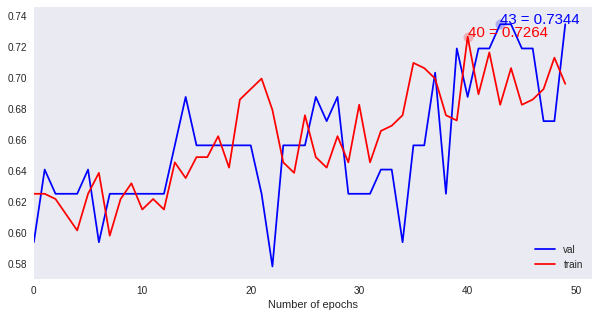

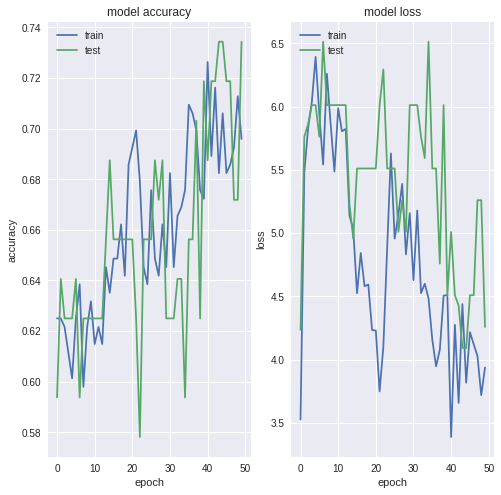

In [0]:
plotKerasLearningCurve()
plt.show()  
plot_learning_curve(history)
plt.show()

In [0]:
test_loss, test_acc = model.evaluate(test_data, test_labels, steps=50)
print('test_acc:', test_acc)

50/50 [==============================] - 19s 387ms/step
test_acc: 0.734375


In [0]:
from sklearn.metrics import confusion_matrix
import itertools    

from sklearn.metrics import classification_report
#print('\nKeras CNN #2 - accuracy:', score[1], '\n')
y_pred = model.predict(test_data)
map_characters = {0: 'B', 1: 'InSitu', 2:'Inva', 3:'N'}
#print('\n', sklearn.metrics.classification_report(np.where(d > 0)[1], np.argmax(y_pred, axis=1), target_names=list(map_characters.values())), sep='') 
Y_pred_classes = np.argmax(y_pred,axis = 1) 
Y_true = np.argmax(test_labels,axis = 1) 
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
plot_confusion_matrix(confusion_mtx, classes = list(map_characters.values())) 

# References

* Araújo T, Aresta G, Castro E, Rouco J, Aguiar P, Eloy C, et al. (2017) Classification of breast cancer histology images using Convolutional Neural Networks. PLoS ONE 12(6).. https://doi.org/10.1371/journal.pone.0177544

* Janowczyk, A; Madabhushi, A. (2016) Deep learning for digital pathology image analysis: A comprehensive tutorial with selected use cases. J Pathol Inform. Jul 26;7:29. doi: 10.4103/2153-3539.186902. eCollection 2016. https://www.ncbi.nlm.nih.gov/pubmed/27563488 

* Angel Cruz-Roa; Ajay Basavanhally; Fabio González; Hannah Gilmore; Michael Feldman; Shridar Ganesan; Natalie Shih; John Tomaszewski; Anant Madabhushi. (2014) Automatic detection of invasive ductal carcinoma in whole slide images with convolutional neural networks. Proc. SPIE 9041, Medical Imaging: Digital Pathology, 904103 (20 March 2014); http://spie.org/Publications/Proceedings/Paper/10.1117/12.2043872.

**Kaggle**


*   https://www.kaggle.com/raoulma/cancer-image-tensorflow-cnn-80-valid-acc 

*   https://www.kaggle.com/paultimothymooney/predicting-idc-in-breast-cancer-histology-images/notebook 


